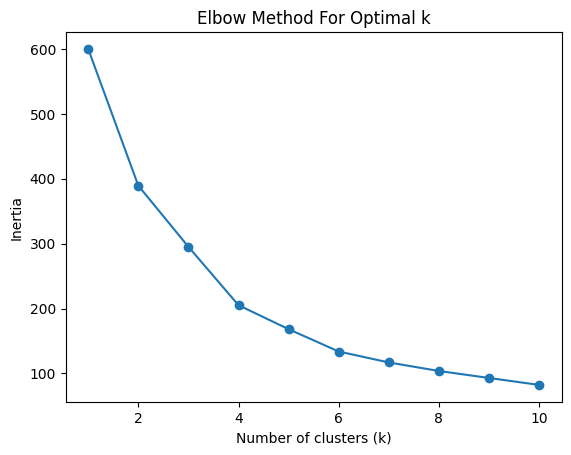

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("Mall_Customers.csv")

# Select only numeric features (ignore Gender column)
data_features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_features)

# Elbow method to choose k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans (try k=5 for Mall Customers)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Show averages for each cluster
print(data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())